<a href="https://colab.research.google.com/github/habiba-226/Tanzania_Tourism_Prediction/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [822]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [823]:
!pip install catboost

In [824]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression,Ridge,Lasso, Lars, LassoLars, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, RANSACRegressor,TheilSenRegressor

In [825]:
train_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/Train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/Test.csv")
sample_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/SampleSubmission.csv")
variables_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/VariableDefinitions.csv")

categorical_columns = train_df.select_dtypes(include="object").columns
numerical_columns = train_df.select_dtypes(include="number").columns
joined_data_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)

#**Data Overview**

In [826]:
train_df

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [827]:
print(variables_df.head(23))

              Column Name                                         Definition
0                      id                 Unique identifier for each tourist
1                 country                The country a tourist coming  from.
2               age_group                        The age group of a tourist.
3             travel_with  The relation of people a tourist travel with t...
4            total_female                            Total number of females
5              total_male                              Total number of males
6                 purpose                  The purpose of visiting  Tanzania
7           main_activity           The main activity of tourism in Tanzania
8            infor_source  The source of information about tourism in Tan...
9         tour_arrangment                The arrangment of visiting Tanzania
10  package_transport_int  If the tour package include international tran...
11   package_accomodation  If the tour package include accommodation service

In [828]:
print(train_df.head())
print(train_df.columns.tolist())
train_df.info()
train_df.describe()

          ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      Independent  ...               

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [829]:
print(sample_df.head())

          ID  total_cost
0     tour_1           0
1   tour_100           0
2  tour_1001           0
3  tour_1006           0
4  tour_1009           0


In [830]:
print(train_df.info())
print("Data Types of Each Column:")
print(train_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [831]:
missing_train = train_df.isnull().sum()
missing_train_percent = 100 * missing_train / len(train_df)
missing_train_df = pd.DataFrame({'Missing Count': missing_train, 'Missing Percent': missing_train_percent})
print(missing_train_df[missing_train_df['Missing Count'] > 0].sort_values(by='Missing Percent', ascending=False))
print("Number of duplicates is:", train_df.duplicated().sum())

                 Missing Count  Missing Percent
travel_with               1114        23.164899
most_impressing            313         6.508630
total_male                   5         0.103972
total_female                 3         0.062383
Number of duplicates is: 0


In [832]:
print(f"The shape of the combined dataframe is: {joined_data_df.shape}")

The shape of the combined dataframe is: (6410, 23)


#**EDA**

##Non-Graphical Methods


###Univarient Non-Graphical EDA

####Analyzing Categorical Data

#####Frequency Tabulation

In [833]:
categorical_columns = train_df.select_dtypes(include="object").columns
print("Statistics for Categorical Columns:", train_df.describe(include='object') )

if not categorical_columns.empty:  # Frequency of Unique Values in Categorical Columns
    for col in categorical_columns:
        print(f"\nColumn: {col}")
        print(train_df[col].value_counts())
else:
    print("No categorical columns found in the dataset.")

Statistics for Categorical Columns:               ID                   country age_group travel_with  \
count       4809                      4809      4809        3695   
unique      4809                       105         4           5   
top     tour_999  UNITED STATES OF AMERICA     25-44       Alone   
freq           1                       695      2487        1265   

                     purpose     main_activity                   info_source  \
count                   4809              4809                          4809   
unique                     7                 9                             8   
top     Leisure and Holidays  Wildlife tourism  Travel, agent, tour operator   
freq                    2840              2259                          1913   

       tour_arrangement package_transport_int package_accomodation  \
count              4809                  4809                 4809   
unique                2                     2                    2   
top         

In [834]:
train_df.describe(include=['O']) # only include columns with the object data type

,ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing
count,4809,4809,4809,3695,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4496
unique,4809,105,4,5,7,9,8,2,2,2,2,2,2,2,2,4,2,7
top,tour_999,UNITED STATES OF AMERICA,25-44,Alone,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,Cash,Yes,Friendly People
freq,1,695,2487,1265,2840,2259,1913,2570,3357,2602,2748,2919,3319,3259,4079,4172,3243,1541


In [835]:
train_df.country.value_counts()

,count
country,
UNITED STATES OF AMERICA,695
UNITED KINGDOM,533
ITALY,393
FRANCE,280
ZIMBABWE,274
...,...
CYPRUS,1
URUGUAY,1
MORROCO,1


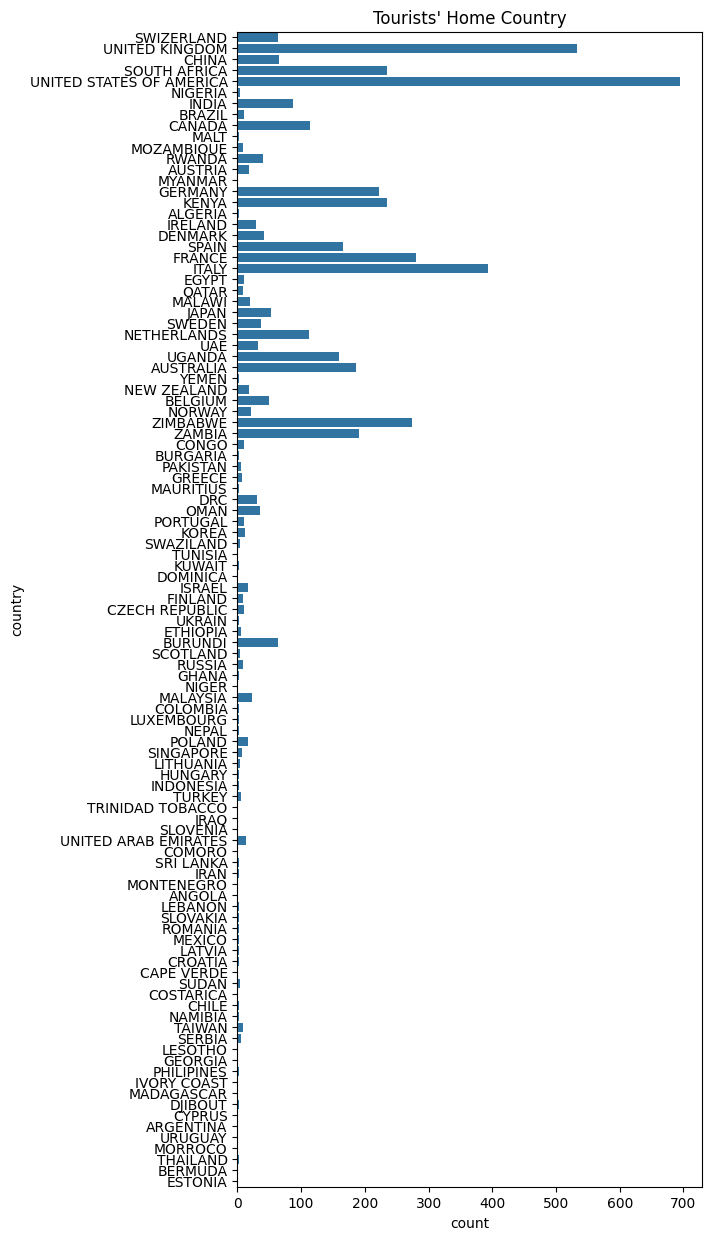

In [836]:
train_df.country.value_counts()
plt.figure(figsize=(6,15))
sns.countplot(train_df['country'])
plt.title("Tourists' Home Country")
plt.show()

*United State of America leads with highest number of tourist, followed by United Kingdom then Italy*

In [837]:
train_df.age_group.value_counts()

,count
age_group,
25-44,2487
45-64,1391
1-24,624
65+,307


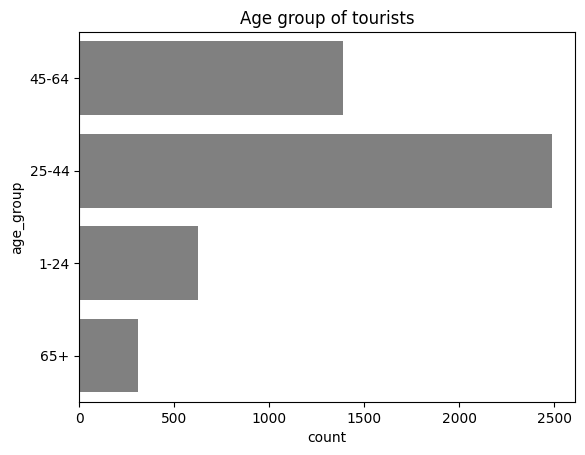

In [838]:
sns.countplot(train_df['age_group'], color='gray')
plt.title("Age group of tourists")
plt.show()

*Most tourists are between 25-44 years*

In [839]:
train_df.travel_with.value_counts()

,count
travel_with,
Alone,1265
Spouse,1005
Friends/Relatives,895
Spouse and Children,368
Children,162


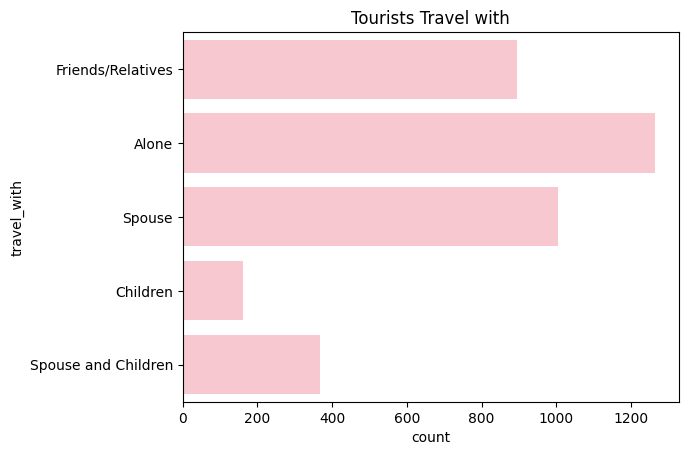

In [840]:
sns.countplot(train_df['travel_with'], color='pink')
plt.title("Tourists Travel with")
plt.show()

*Most tourists travel alone or with a spouse*

In [841]:
train_df.purpose.value_counts()

,count
purpose,
Leisure and Holidays,2840
Business,671
Visiting Friends and Relatives,633
Meetings and Conference,312
Volunteering,138
Other,128
Scientific and Academic,87


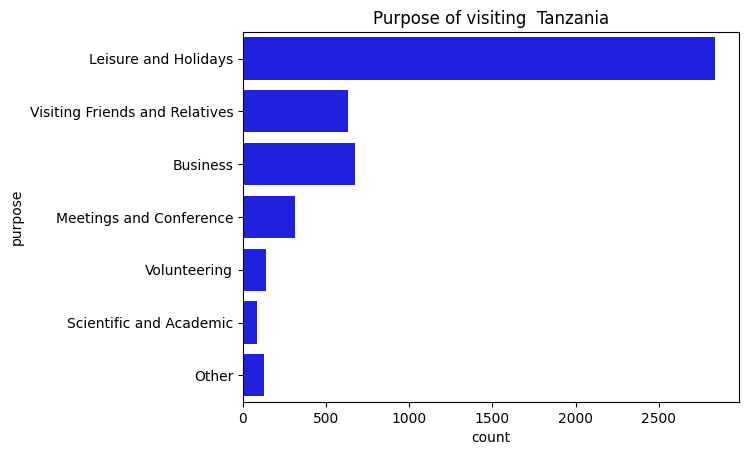

In [842]:
sns.countplot(train_df['purpose'], color='blue')
plt.title("Purpose of visiting  Tanzania")
plt.show()

*Most tourists go for leisure and holidays (on vacation)*

In [843]:
train_df.main_activity.value_counts()

,count
main_activity,
Wildlife tourism,2259
Beach tourism,1025
Hunting tourism,457
Conference tourism,367
Cultural tourism,359
Mountain climbing,234
business,58
Bird watching,37
Diving and Sport Fishing,13


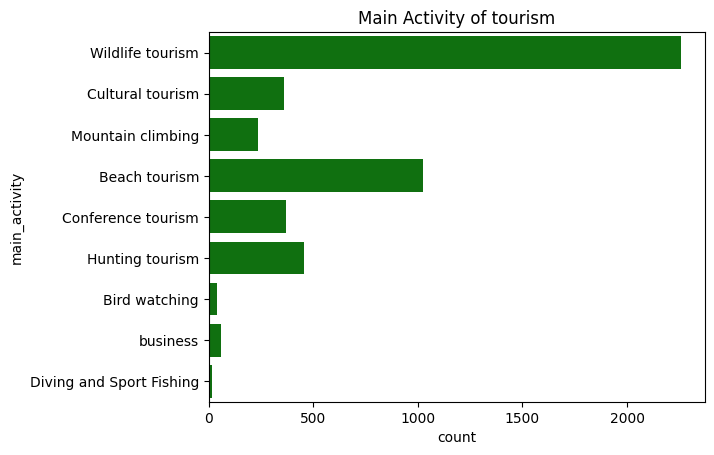

In [844]:
sns.countplot(train_df['main_activity'], color='green')
plt.title("Main Activity of tourism")
plt.show()

*Most tourists visit for the wildlife and the beach*

In [845]:
train_df.info_source.value_counts()

,count
info_source,
"Travel, agent, tour operator",1913
"Friends, relatives",1635
others,490
"Newspaper, magazines,brochures",359
"Radio, TV, Web",249
Trade fair,77
Tanzania Mission Abroad,68
inflight magazines,18


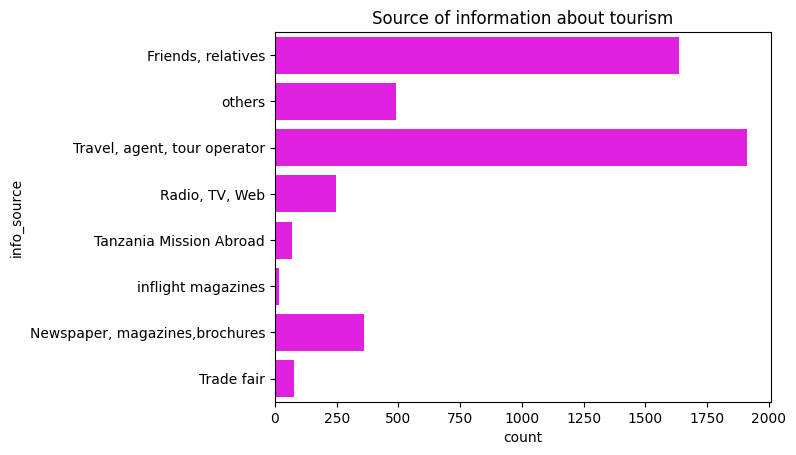

In [846]:
sns.countplot(train_df['info_source'], color='magenta')
plt.title("Source of information about tourism")
plt.show()

*Most tourists hear about Tanzania Tourism from Travel agent and tour operator*

In [847]:
train_df.tour_arrangement.value_counts()

,count
tour_arrangement,
Independent,2570
Package Tour,2239


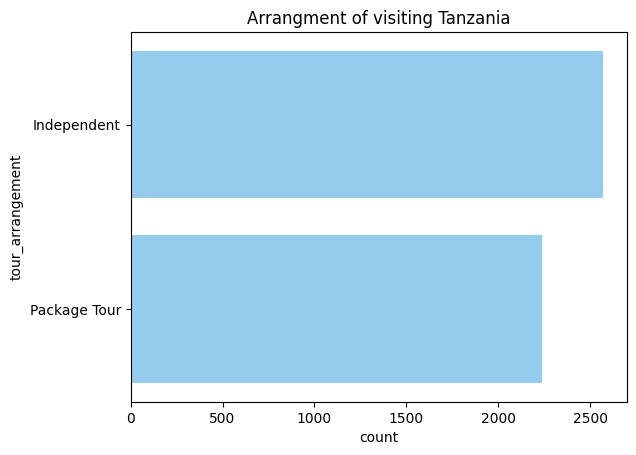

In [848]:
sns.countplot(train_df['tour_arrangement'], color='lightskyblue')
plt.title("Arrangment of visiting Tanzania")
plt.show()

*Most tourists go independlty *

In [849]:
train_df.package_transport_int.value_counts()

,count
package_transport_int,
No,3357
Yes,1452


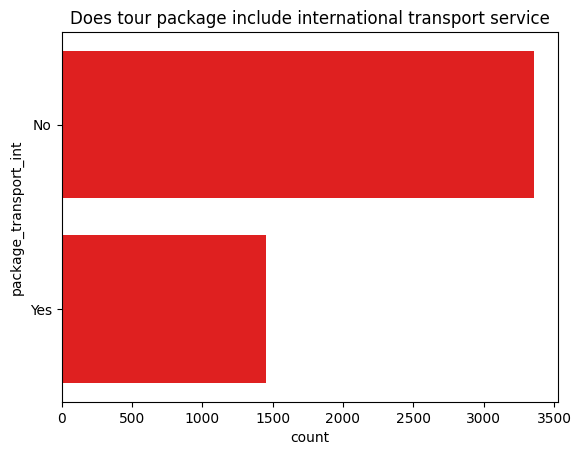

In [850]:
sns.countplot(train_df['package_transport_int'], color='red')
plt.title("Does tour package include international transport service")
plt.show()

*Most tour packages don't include transport service*

In [851]:
train_df.package_accomodation.value_counts()

,count
package_accomodation,
No,2602
Yes,2207


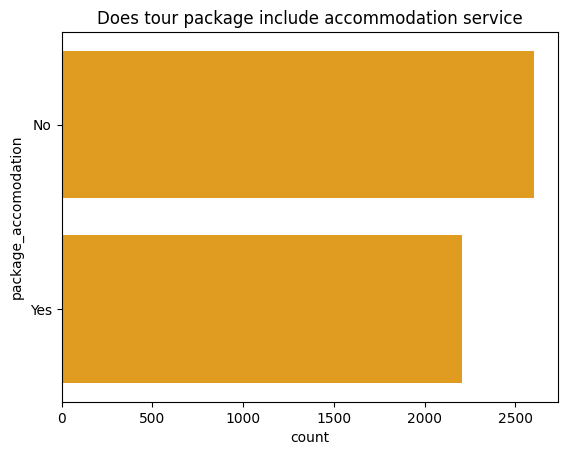

In [852]:
sns.countplot(train_df['package_accomodation'], color='orange')
plt.title("Does tour package include accommodation service")
plt.show()

*Most tour packages don't include accommodation service*

In [853]:
train_df.package_food.value_counts()

,count
package_food,
No,2748
Yes,2061


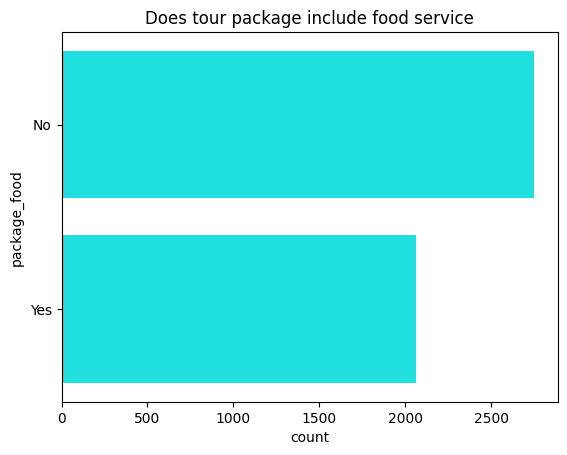

In [854]:
sns.countplot(train_df['package_food'], color='cyan')
plt.title("Does tour package include food service")
plt.show()

*Most tour packages don't include food services*

In [855]:
train_df.package_transport_tz.value_counts()

,count
package_transport_tz,
No,2919
Yes,1890


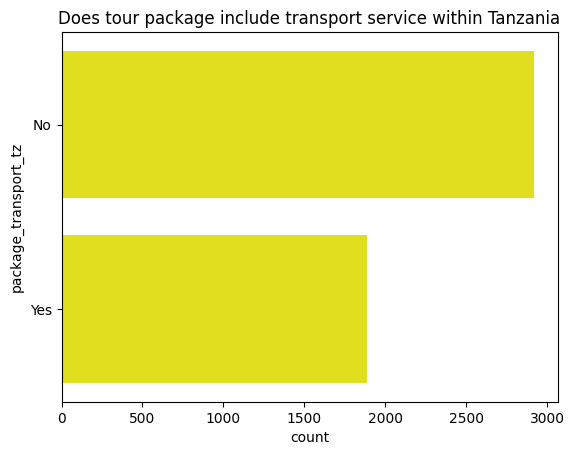

In [856]:
sns.countplot(train_df['package_transport_tz'], color='yellow')
plt.title("Does tour package include transport service within Tanzania")
plt.show()

*Most tour packages don't include transport service within Tanzania*

In [857]:
train_df.package_sightseeing.value_counts()

,count
package_sightseeing,
No,3319
Yes,1490


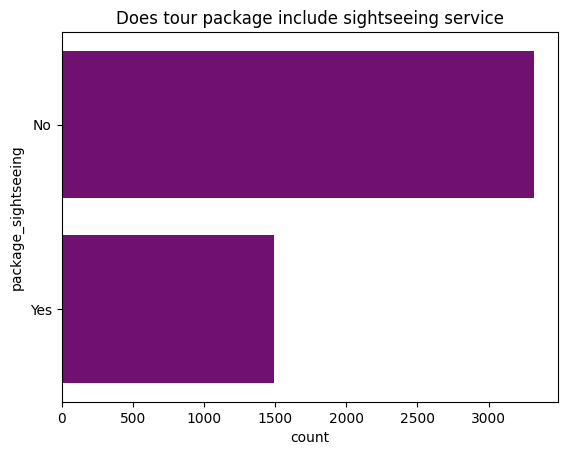

In [858]:
sns.countplot(train_df['package_sightseeing'], color='purple')
plt.title("Does tour package include sightseeing service")
plt.show()

*Most tour packages don't include sightseeing service*

In [859]:
train_df.package_guided_tour.value_counts()

,count
package_guided_tour,
No,3259
Yes,1550


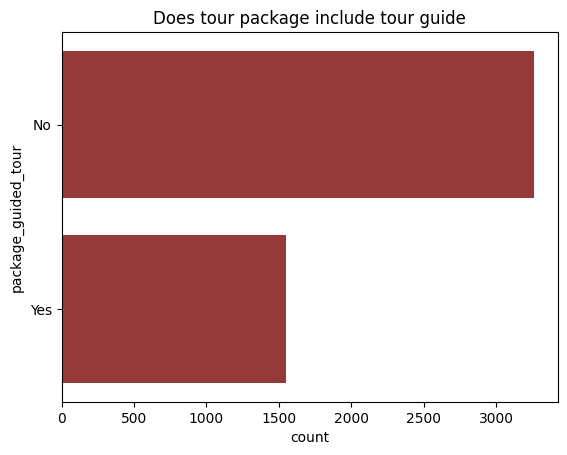

In [860]:
sns.countplot(train_df['package_guided_tour'], color='brown')
plt.title("Does tour package include tour guide")
plt.show()

*Most tour packages don't include  tour guide*

In [861]:
train_df.package_insurance.value_counts()

,count
package_insurance,
No,4079
Yes,730


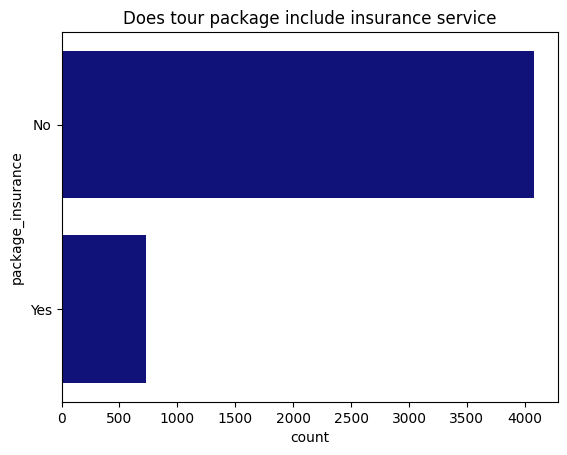

In [862]:
sns.countplot(train_df['package_insurance'], color='darkblue')
plt.title("Does tour package include insurance service")
plt.show()

*Most tour packages don't include insurance service*

In [863]:
train_df.payment_mode.value_counts()

,count
payment_mode,
Cash,4172
Credit Card,622
Other,8
Travellers Cheque,7


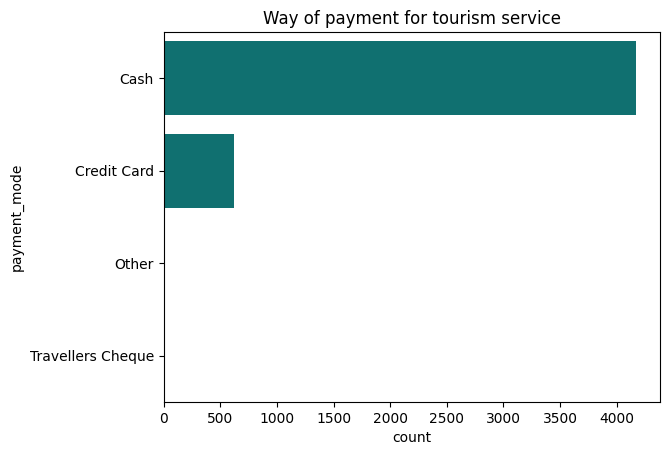

In [864]:
sns.countplot(train_df['payment_mode'], color='teal')
plt.title("Way of payment for tourism service")
plt.show()

*Most tourists pay using cash*

In [865]:
train_df.first_trip_tz.value_counts()

,count
first_trip_tz,
Yes,3243
No,1566


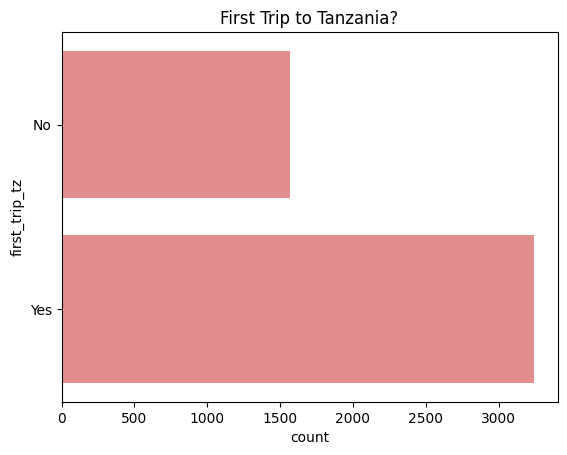

In [866]:
sns.countplot(train_df['first_trip_tz'], color='lightcoral')
plt.title("First Trip to Tanzania?")
plt.show()

*This is most tourists first trip to Tanzania*

In [867]:
train_df.most_impressing.value_counts()

,count
most_impressing,
Friendly People,1541
Wildlife,1038
No comments,743
"Wonderful Country, Landscape, Nature",507
Good service,365
Excellent Experience,271
Satisfies and Hope Come Back,31


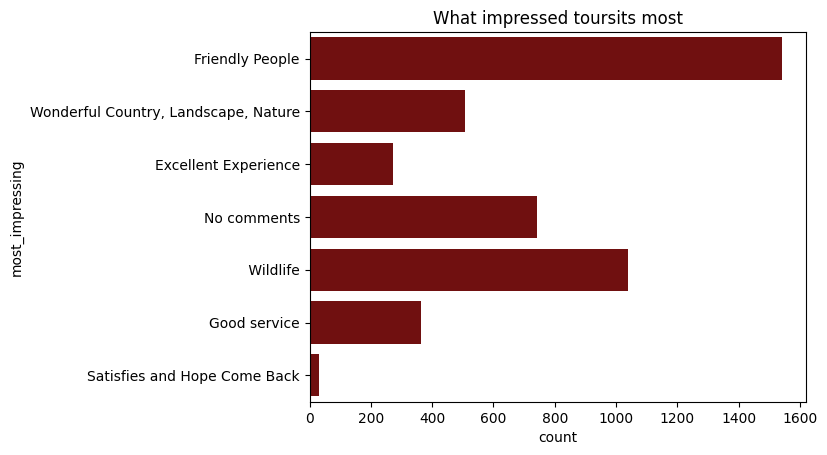

In [868]:
sns.countplot(train_df['most_impressing'], color='maroon')
plt.title("What impressed toursits most")
plt.show()

*Most tourists found friendly people and wildlife most impressing*

####Analyzing Numerical Data


#####Central Tendency Measures and Spread Measures

In [869]:
numerical_df = train_df.select_dtypes(include="number")
variance = numerical_df.var()
mode = numerical_df.mode()
print("Statistics for Numerical Columns:", train_df.describe())
print(f"Variancet: {variance}")
print(f"Mode: {mode}")

Statistics for Numerical Columns:        total_female   total_male  night_mainland  night_zanzibar    total_cost
count   4806.000000  4804.000000     4809.000000     4809.000000  4.809000e+03
mean       0.926758     1.009575        8.488043        2.304429  8.114389e+06
std        1.288242     1.138865       10.427624        4.227080  1.222490e+07
min        0.000000     0.000000        0.000000        0.000000  4.900000e+04
25%        0.000000     1.000000        3.000000        0.000000  8.121750e+05
50%        1.000000     1.000000        6.000000        0.000000  3.397875e+06
75%        1.000000     1.000000       11.000000        4.000000  9.945000e+06
max       49.000000    44.000000      145.000000       61.000000  9.953288e+07
Variancet: total_female      1.659567e+00
total_male        1.297014e+00
night_mainland    1.087353e+02
night_zanzibar    1.786820e+01
total_cost        1.494483e+14
dtype: float64
Mode:    total_female  total_male  night_mainland  night_zanzibar  total_c

In [870]:
print("Target Variable (total_cost) description")
print(train_df['total_cost'].describe())
variance_total_cost = train_df['total_cost'].var()
mode_total_cost = train_df['total_cost'].mode()
print(f"Variance: {variance_total_cost}")
print(f"Mode: {mode_total_cost}")

# Calculate IQR
Q1_tc = train_df['total_cost'].quantile(0.25)
print(f"Q1 (25th percentile) of total_cost: {Q1_tc}")

Q3_tc = train_df['total_cost'].quantile(0.75)
print(f"Q3 (75th percentile) of total_cost: {Q3_tc}")

IQR_tc = Q3_tc - Q1_tc
print(f"IQR of total_cost: {IQR_tc}")

Target Variable (total_cost) description
count    4.809000e+03
mean     8.114389e+06
std      1.222490e+07
min      4.900000e+04
25%      8.121750e+05
50%      3.397875e+06
75%      9.945000e+06
max      9.953288e+07
Name: total_cost, dtype: float64
Variance: 149448259519963.25
Mode: 0    1657500.0
Name: total_cost, dtype: float64
Q1 (25th percentile) of total_cost: 812175.0
Q3 (75th percentile) of total_cost: 9945000.0
IQR of total_cost: 9132825.0


#####Skewness and Kurtosis

In [871]:
print("Skewness of Numerical Columns:")
print(numerical_df.skew())
kurtosis = numerical_df.kurt()
print(f"Kurtosisof Numerical Columns: \n{kurtosis}")

Skewness of Numerical Columns:
total_female      13.037028
total_male        13.810141
night_mainland     4.026044
night_zanzibar     4.226719
total_cost         2.967848
dtype: float64
Kurtosisof Numerical Columns: 
total_female      416.090526
total_male        445.338624
night_mainland     26.392706
night_zanzibar     35.987216
total_cost         11.431051
dtype: float64


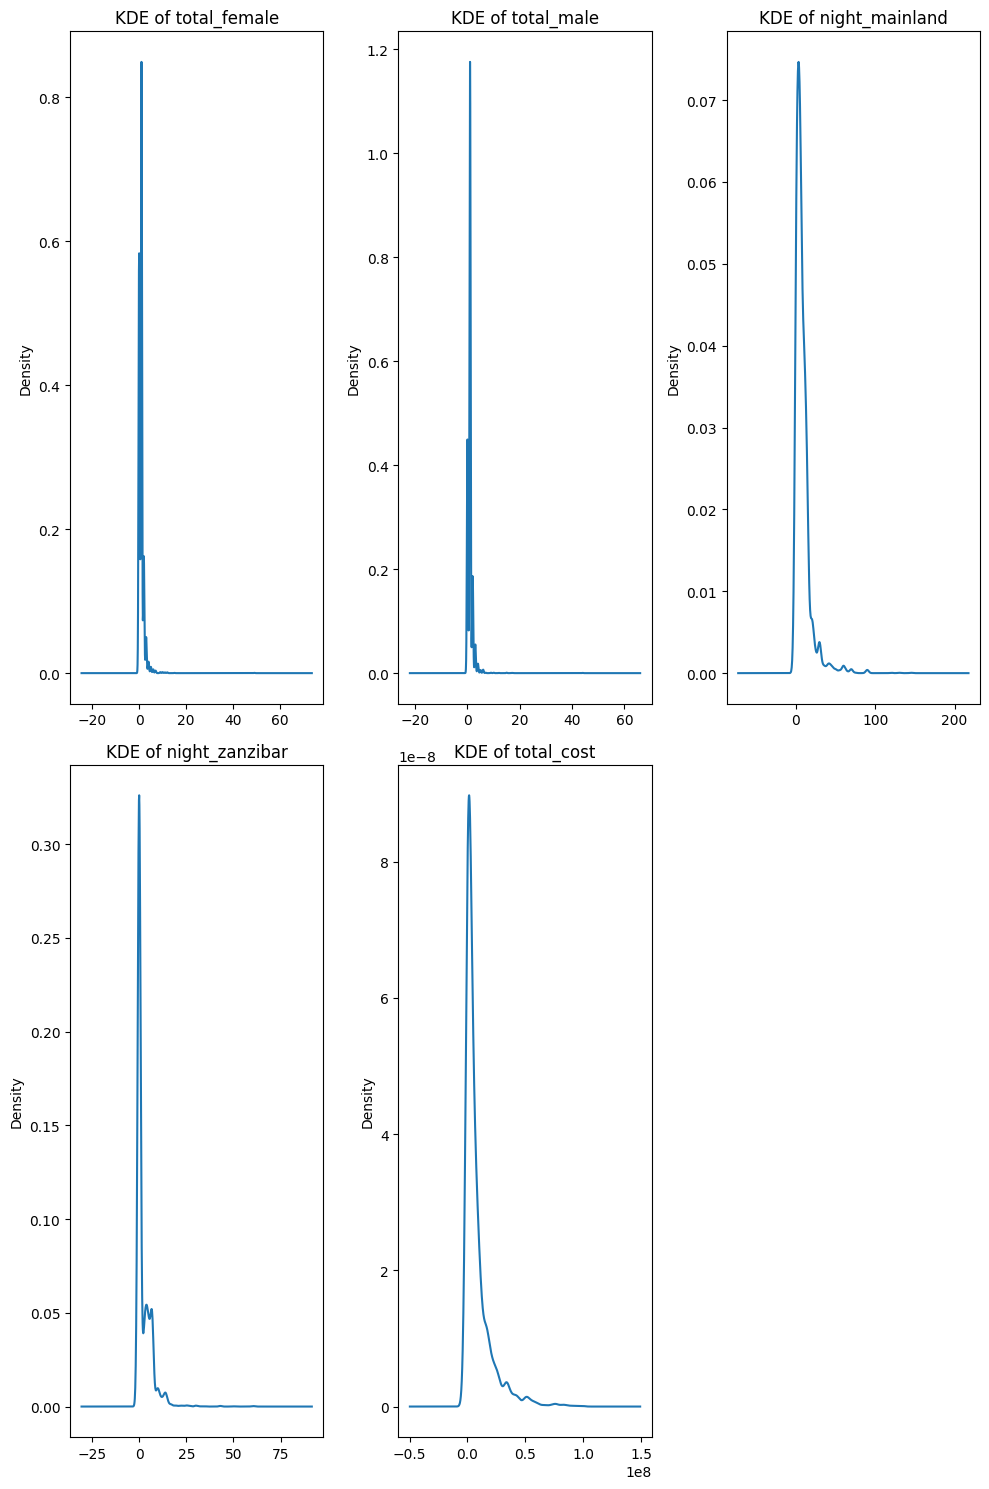

In [872]:
numerical_columns = train_df.select_dtypes(include="number")
numerical_columns.skew()
plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_columns.columns.tolist()):
  plt.subplot(2,3,i+1)
  train_df[col].plot(kind='kde')
  plt.title(f"KDE of {col}")
plt.tight_layout()
plt.show()

###Multivarient Non-Graphical EDA

####Analyzing Categorical Data

#####Cross Tabulation

In [873]:
cross_tab = pd.crosstab(train_df['country'], train_df['age_group'],margins=True)
cross_tab

age_group,1-24,25-44,45-64,65+,All
country,,,,,
ALGERIA,0,2,0,0,2
ANGOLA,0,0,1,0,1
ARGENTINA,0,0,1,0,1
AUSTRALIA,14,65,72,35,186
AUSTRIA,3,10,5,0,18
...,...,...,...,...,...
URUGUAY,0,1,0,0,1
YEMEN,0,0,2,0,2
ZAMBIA,10,147,32,2,191


In [874]:
cross_tab = pd.crosstab(train_df['age_group'], train_df['travel_with'],margins=True)
cross_tab
##need to handle missing values in travel_with

travel_with,Alone,Children,Friends/Relatives,Spouse,Spouse and Children,All
age_group,,,,,,
1-24,234,4,154,41,12,445
25-44,697,61,499,487,130,1874
45-64,275,87,200,332,219,1113
65+,59,10,42,145,7,263
All,1265,162,895,1005,368,3695


In [875]:
cross_tab = pd.crosstab(train_df['age_group'], train_df['most_impressing'],margins=True)
cross_tab
##need to handle missing data of most impressive

most_impressing,Wildlife,Excellent Experience,Friendly People,Good service,No comments,Satisfies and Hope Come Back,"Wonderful Country, Landscape, Nature",All
age_group,,,,,,,,
1-24,119,31,178,72,102,1,87,590
25-44,511,134,765,189,408,16,267,2290
45-64,301,91,488,89,205,13,129,1316
65+,107,15,110,15,28,1,24,300
All,1038,271,1541,365,743,31,507,4496


####Analyzing Numerical Data


#####Group-by Aggregation

In [876]:
country_avg_spending = pd.DataFrame(train_df.groupby(['country'])['total_cost'].mean().sort_values(ascending=False))

print("Average Total Cost by Country:")
country_avg_spending.head() # Display top few countries by average spending

Average Total Cost by Country:


,total_cost
country,
DOMINICA,3.315000e+07
COSTARICA,2.718300e+07
SLOVENIA,1.906237e+07
TUNISIA,1.574625e+07
AUSTRALIA,1.474802e+07


In [877]:
age_group_avg_spending  = pd.DataFrame(train_df.groupby(['age_group'])['total_cost'].mean().sort_values(ascending=False))
print("\nAverage Total Cost by Age Group:")
age_group_avg_spending.head()


Average Total Cost by Age Group:


,total_cost
age_group,
65+,1.721195e+07
45-64,1.105093e+07
25-44,6.026176e+06
1-24,5.415205e+06


In [878]:
age_country_avg_spending  = pd.DataFrame(train_df.groupby(['country','age_group'])['total_cost'].mean().sort_values(ascending=False))
print("\nAverage Total Cost by Country and Age Group:")
age_country_avg_spending.head(15)


Average Total Cost by Country and Age Group:


,,total_cost
country,age_group,
SWEDEN,65+,5.221125e+07
NEW ZEALAND,65+,3.729375e+07
DOMINICA,65+,3.315000e+07
ISRAEL,45-64,3.163753e+07
QATAR,25-44,2.970630e+07
AUSTRALIA,65+,2.730855e+07
COSTARICA,25-44,2.718300e+07
DENMARK,65+,2.622609e+07
MEXICO,45-64,2.502825e+07


In [879]:
travel_with_avg_spending  = pd.DataFrame(train_df.groupby(['travel_with'])['total_cost'].mean().sort_values(ascending=False))
travel_with_avg_spending.head()

,total_cost
travel_with,
Spouse and Children,1.833085e+07
Spouse,1.268289e+07
Friends/Relatives,1.023318e+07
Children,1.020680e+07
Alone,3.426150e+06


#####Covariance and Correlation

In [880]:
print("Covariance Matrix:")
numeric_df = train_df.select_dtypes(include=[np.number])
cov_matrix = numeric_df.cov()
display(cov_matrix)

Covariance Matrix:


,total_female,total_male,night_mainland,night_zanzibar,total_cost
total_female,1.659567e+00,6.856867e-01,4.192270e-01,7.545862e-01,4.506653e+06
total_male,6.856867e-01,1.297014e+00,-4.985291e-01,2.423288e-01,2.572466e+06
night_mainland,4.192270e-01,-4.985291e-01,1.087353e+02,-5.208090e+00,2.609845e+06
night_zanzibar,7.545862e-01,2.423288e-01,-5.208090e+00,1.786820e+01,7.500156e+06
total_cost,4.506653e+06,2.572466e+06,2.609845e+06,7.500156e+06,1.494483e+14


In [881]:
##print("Correlation Matrix (Pearson):")
##corr_matrix = numeric_df.corr(method='pearson')
##display(corr_matrix)
##use pearson after distributed and normalized and less outliers for now kendall
print("Correlation Matrix (Kendall):")
kendall_corr = numeric_df.corr(method='kendall')
display(kendall_corr)

Correlation Matrix (Kendall):


,total_female,total_male,night_mainland,night_zanzibar,total_cost
total_female,1.000000,-0.121549,0.064146,0.296041,0.327283
total_male,-0.121549,1.000000,-0.072074,0.096414,0.123620
night_mainland,0.064146,-0.072074,1.000000,-0.137278,0.135482
night_zanzibar,0.296041,0.096414,-0.137278,1.000000,0.254653
total_cost,0.327283,0.123620,0.135482,0.254653,1.000000


In [882]:
corr_matrix = train_df[['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']].corr()
print(corr_matrix)

                total_female  total_male  night_mainland  night_zanzibar  \
total_female        1.000000    0.471180        0.031200        0.138555   
total_male          0.471180    1.000000       -0.041964        0.050318   
night_mainland      0.031200   -0.041964        1.000000       -0.118155   
night_zanzibar      0.138555    0.050318       -0.118155        1.000000   
total_cost          0.286097    0.185848        0.020473        0.145139   

                total_cost  
total_female      0.286097  
total_male        0.185848  
night_mainland    0.020473  
night_zanzibar    0.145139  
total_cost        1.000000  


##Graphical Methods

###Univarient Graphical EDA

####Boxplot

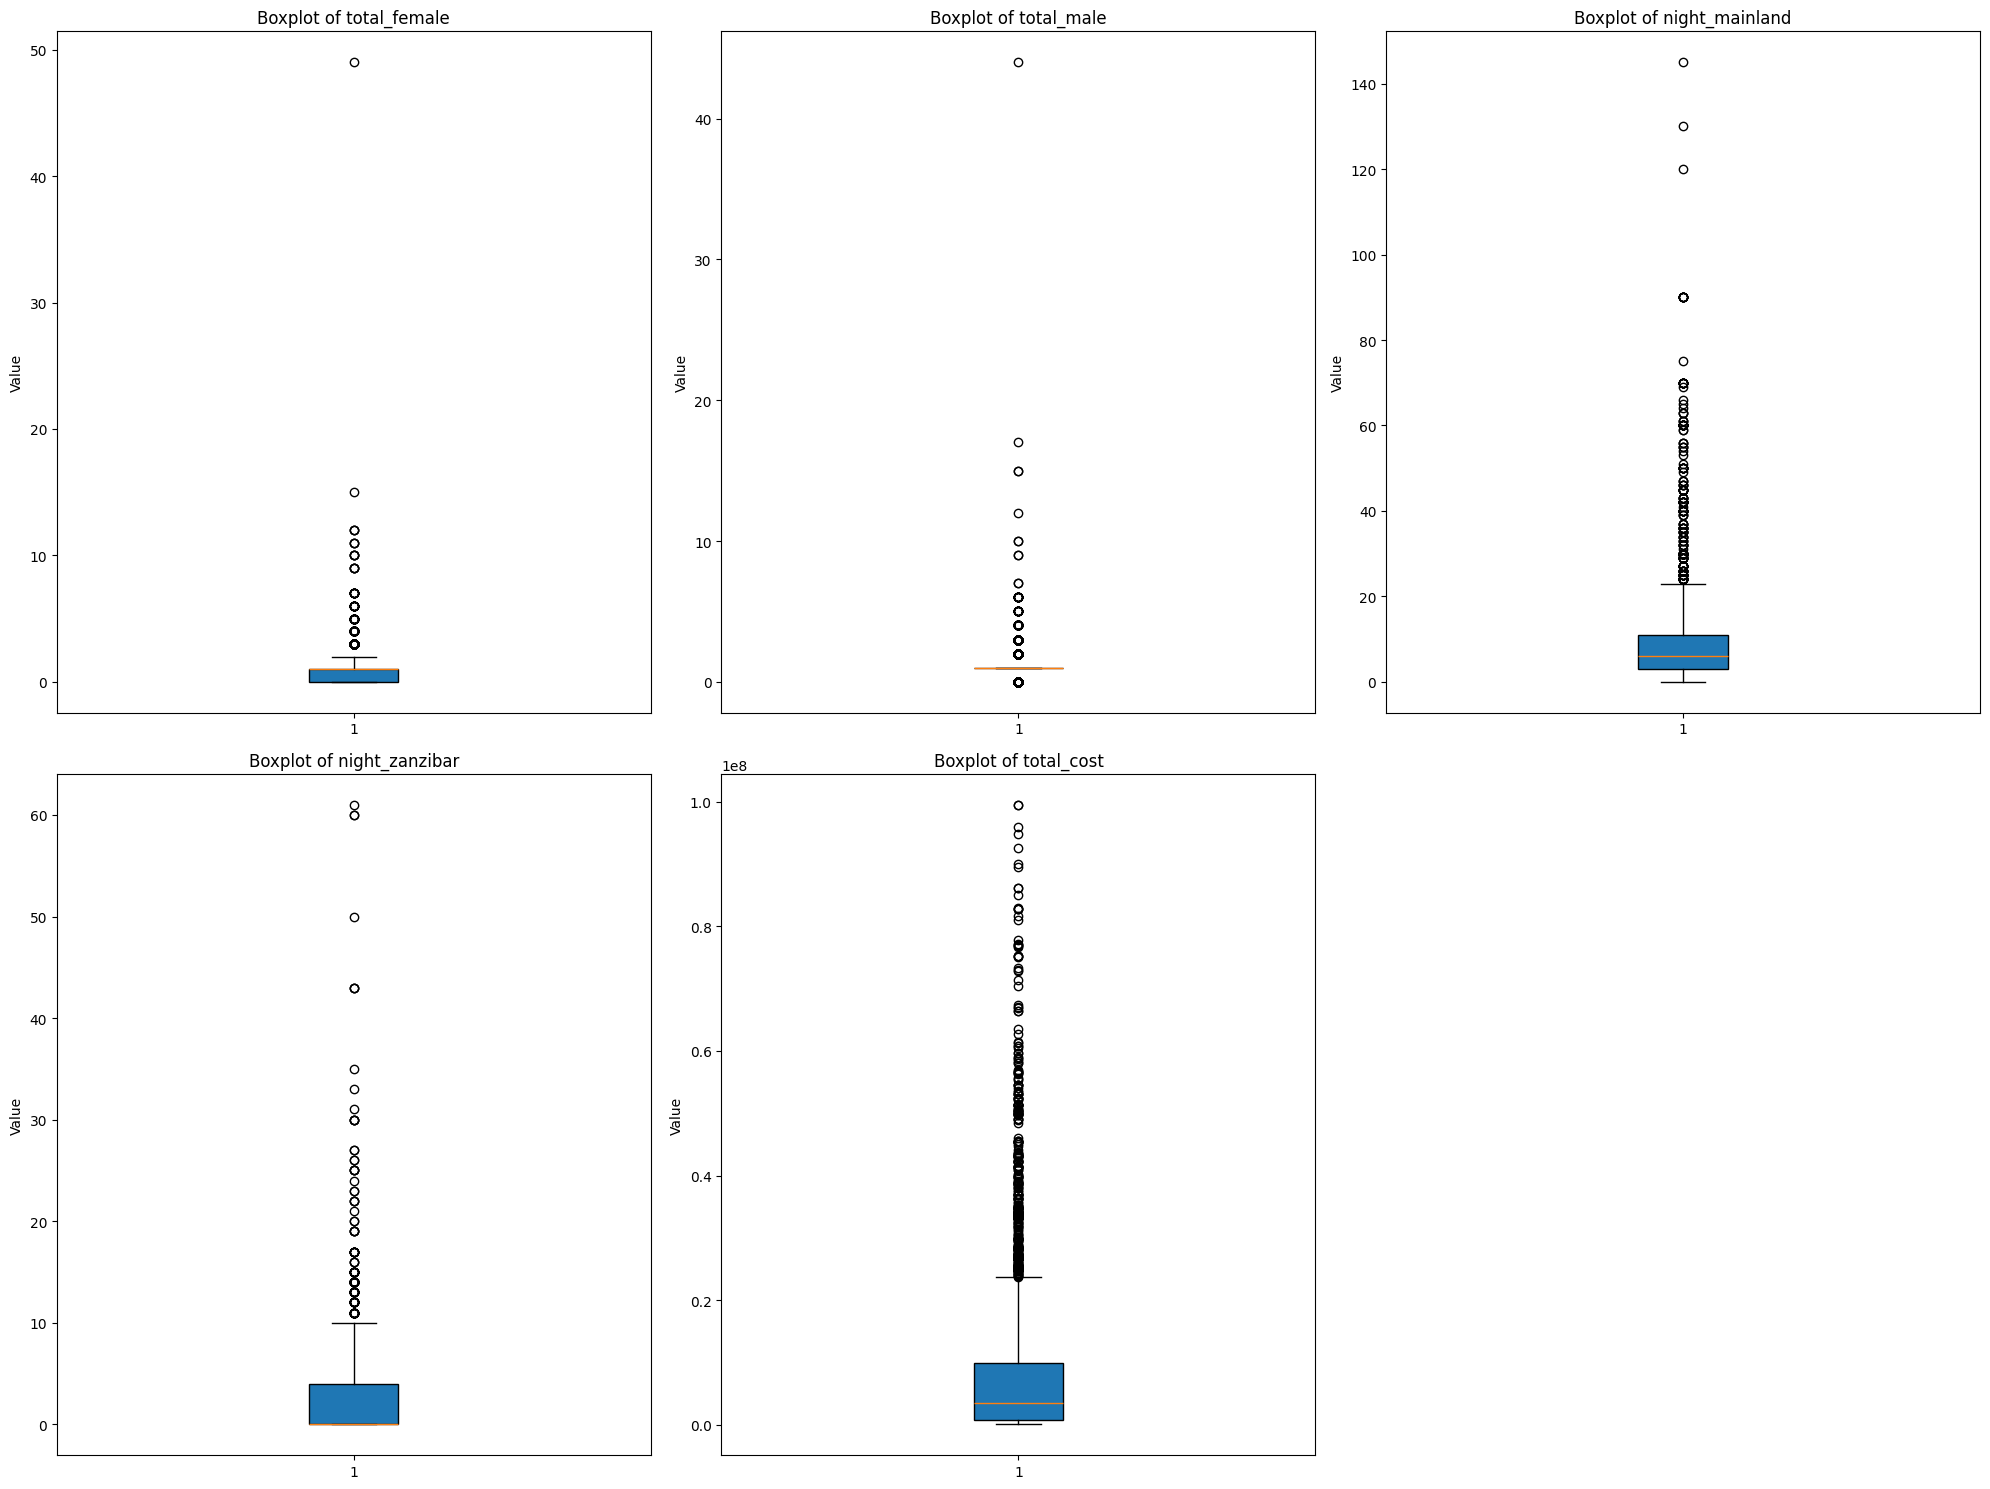

In [883]:
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_columns.columns.tolist()):
  plt.subplot(2,3,i+1)
  plt.boxplot(train_df[col].dropna(), patch_artist=True)
  plt.ylabel("Value")
  plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

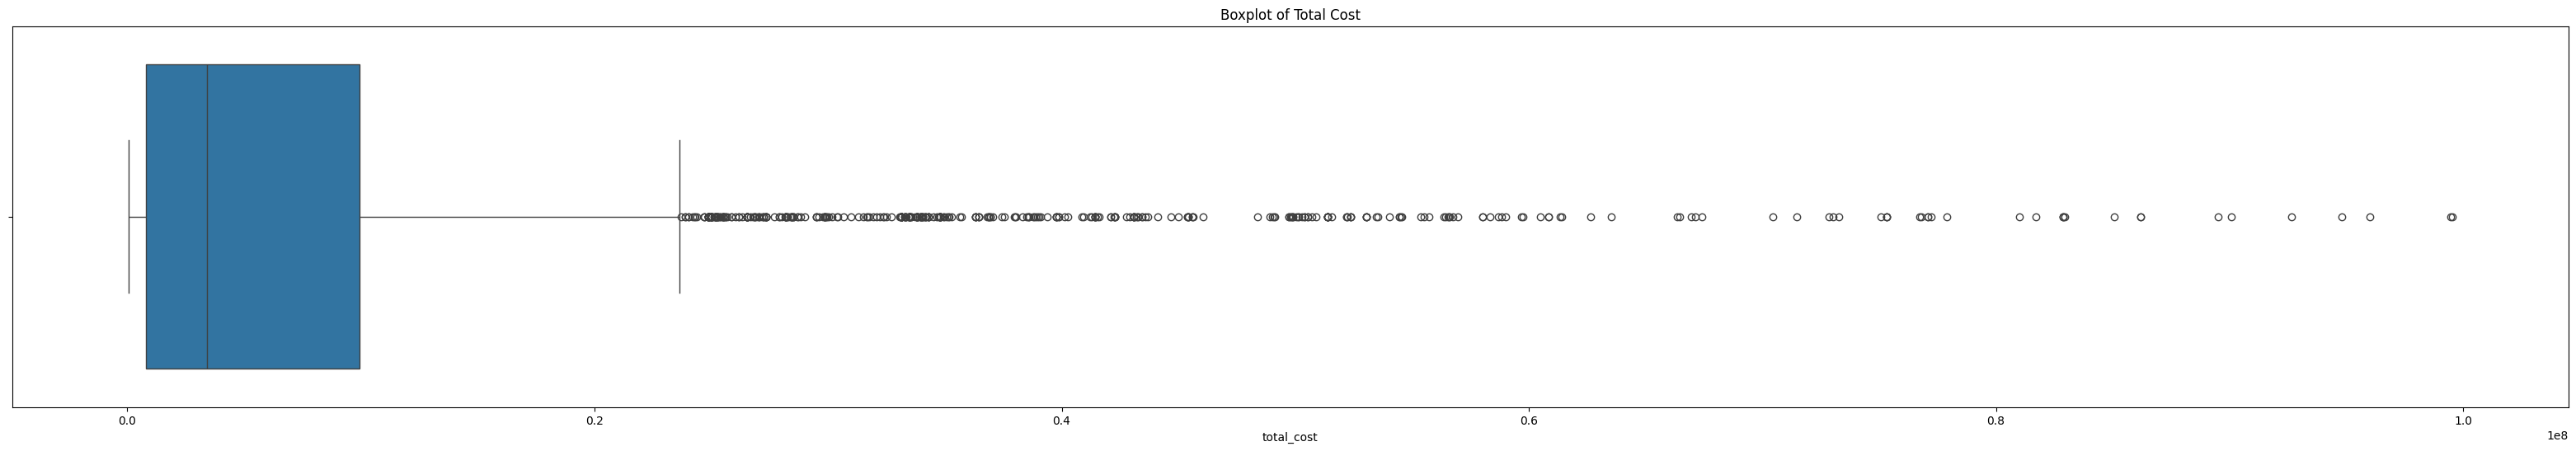

In [884]:
# A closer look at our target variable
fig, ax = plt.subplots(figsize=(40, 6))
sns.boxplot(data=train_df, x='total_cost', ax=ax)
plt.title('Boxplot of Total Cost')
plt.show()

Our target variable, total_cost, shows right-skewness, with by a long tail of high-value outliers.

> Do we remove outliers?

No, These unusually high values in total_cost and related features aren't mistakes — they reflect real differences caused by economic factors. Some tourists may spend more because of higher income, longer stays, or employer-covered trips. It's important to keep this "raw" data because it holds useful information that helps make better predictions and tourism decisions. Changing or removing these values could lead to losing important insights.

####Histogram

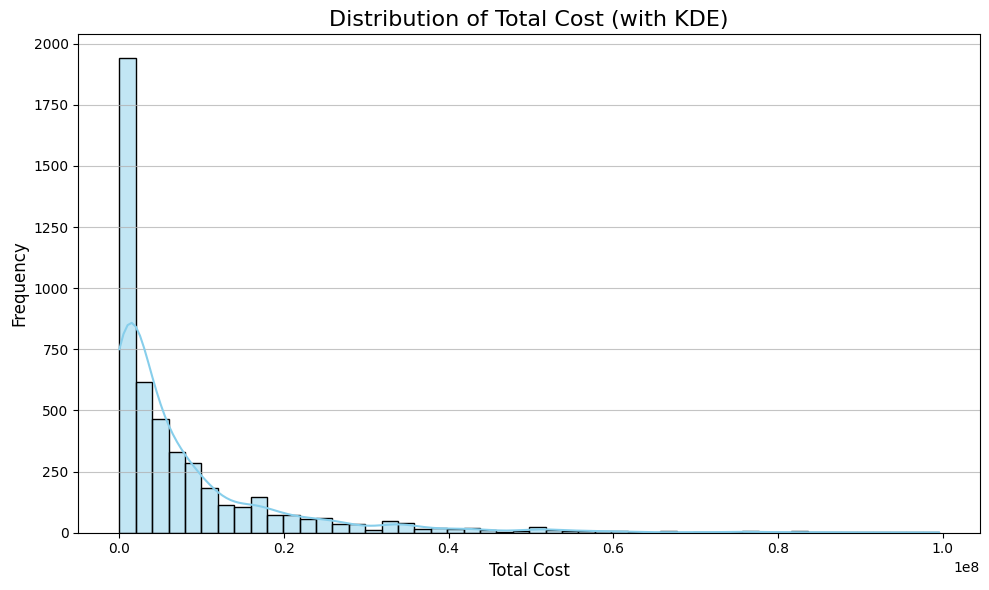

In [885]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['total_cost'], kde=True, bins=50, color='skyblue') # kde adds a density curve
plt.title('Distribution of Total Cost (with KDE)', fontsize=16)
plt.xlabel('Total Cost', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show() # times 10 to the power of 8

<Axes: xlabel='total_cost', ylabel='Density'>

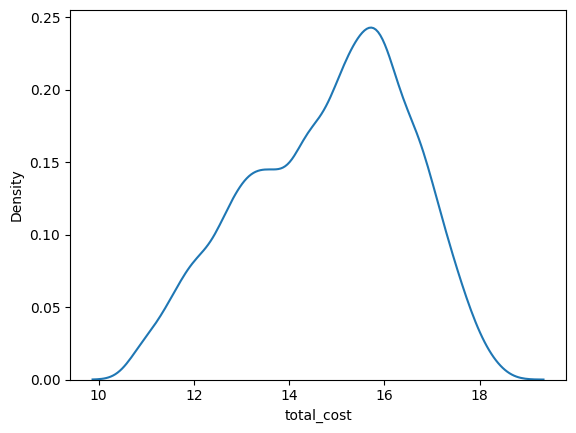

In [886]:
target=train_df["total_cost"]
log_target = np.log1p(target)
sns.kdeplot(log_target)

####Quantile-Normal Plot

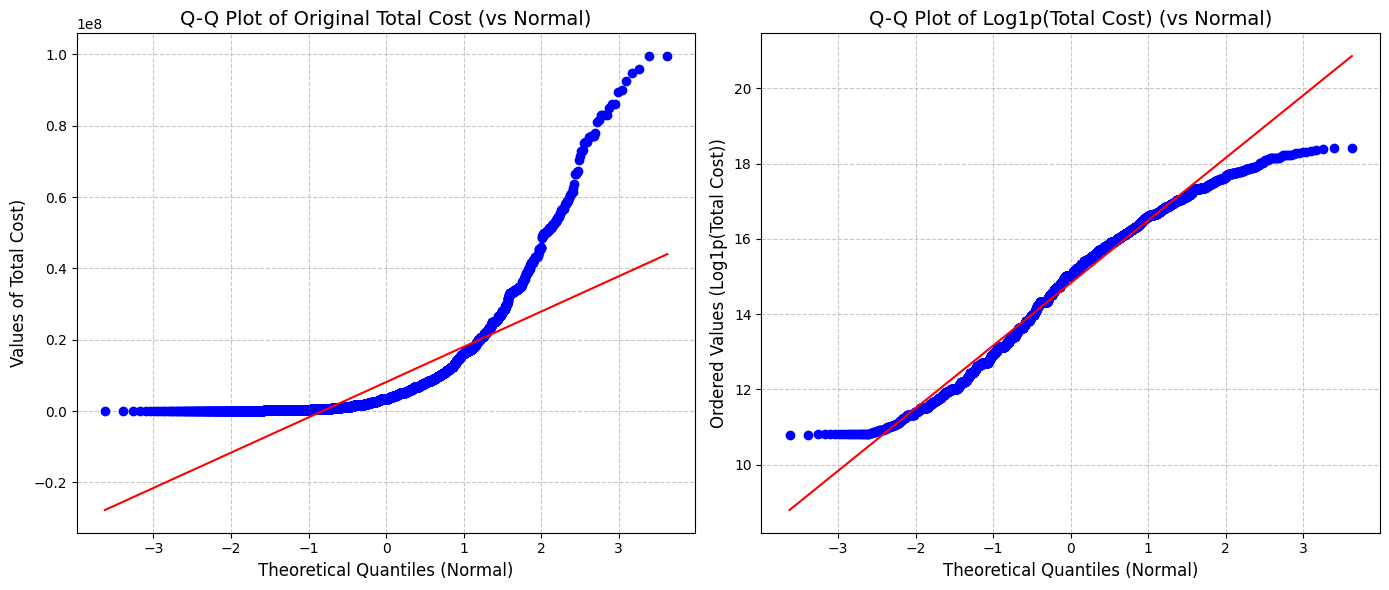

In [887]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(train_df['total_cost'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Original Total Cost (vs Normal)', fontsize=14)
plt.xlabel('Theoretical Quantiles (Normal)', fontsize=12)
plt.ylabel('Values of Total Cost)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

train_df['total_cost_log'] = np.log1p(train_df['total_cost'])
plt.subplot(1, 2, 2)
stats.probplot(train_df['total_cost_log'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log1p(Total Cost) (vs Normal)', fontsize=14)
plt.xlabel('Theoretical Quantiles (Normal)', fontsize=12)
plt.ylabel('Ordered Values (Log1p(Total Cost))', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

###Multivarient Graphical EDA

####Heat Map

<Axes: >

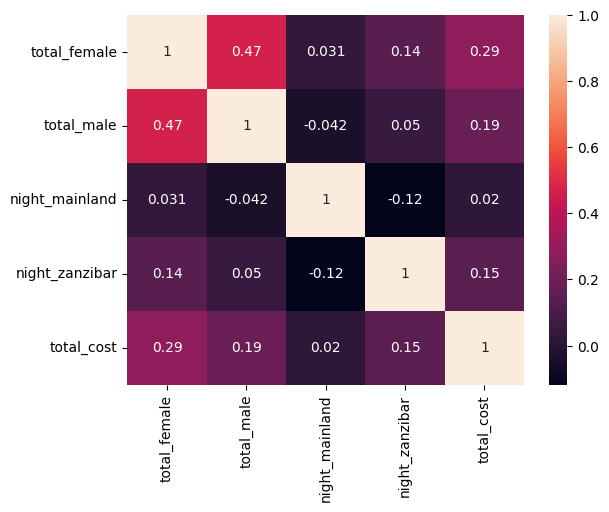

In [888]:
heatmap_data = train_df[['total_female', 'total_male', 'night_mainland', 'night_zanzibar','total_cost']]
sns.heatmap(heatmap_data.corr(), annot=True)

####Bar graphs

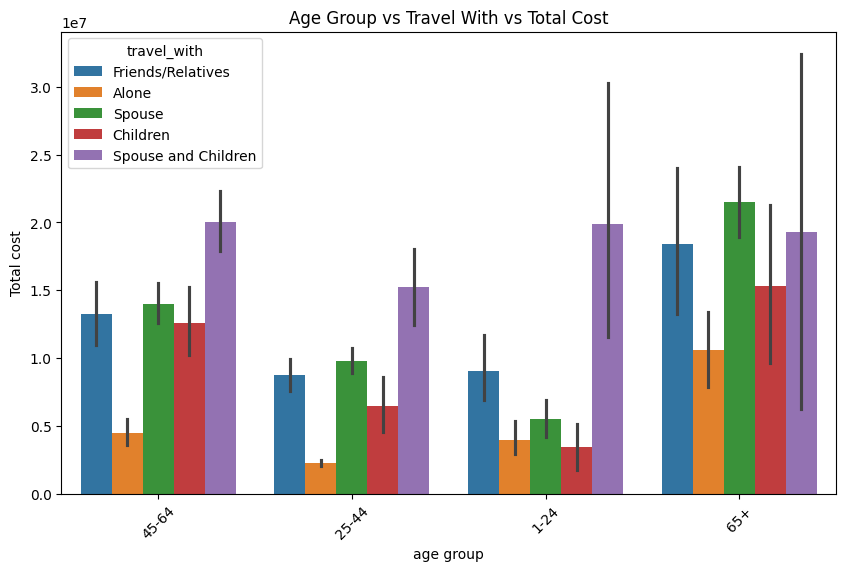

In [889]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_cost', hue='travel_with', data=train_df)
plt.xlabel('age group')
plt.ylabel('Total cost')
plt.title('Age Group vs Travel With vs Total Cost')
plt.xticks(rotation=45)
plt.show()

*Younger tourists (1-64) tend to spend more with spouse and children*

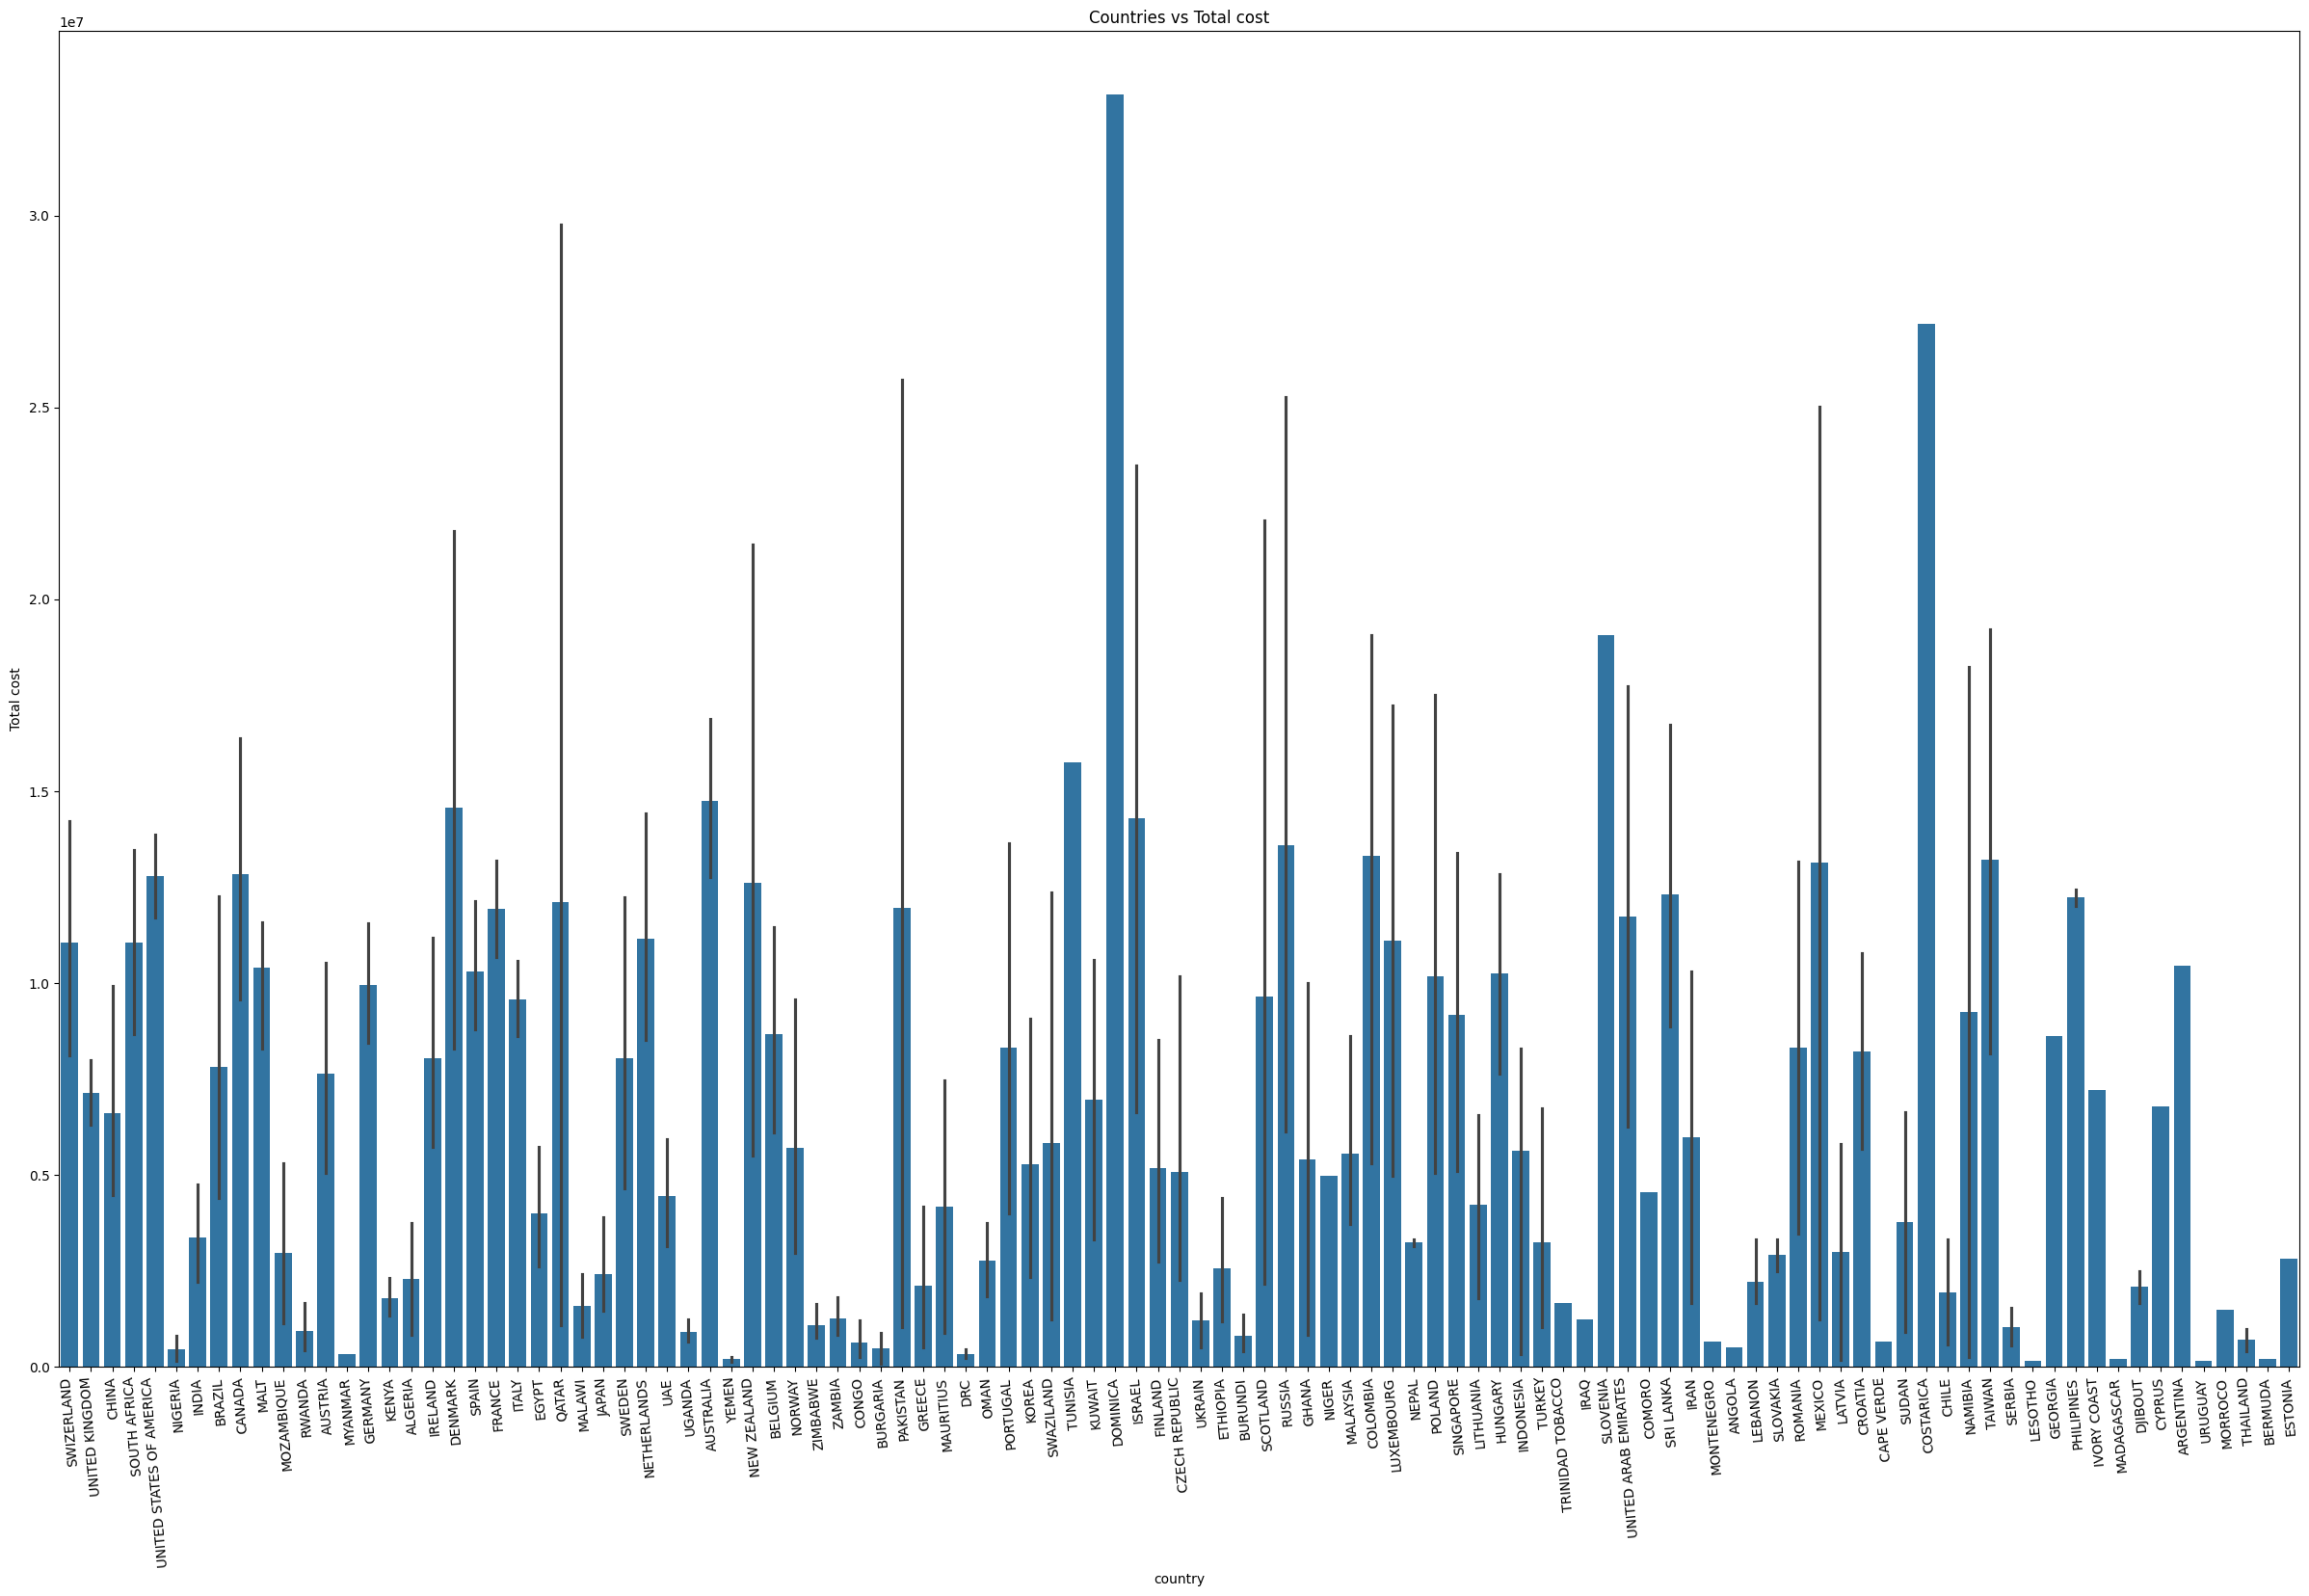

In [890]:
plt.figure(figsize=(30, 18))
sns.barplot(x='country', y='total_cost', data=train_df)
plt.xlabel('country')
plt.ylabel('Total cost')
plt.title('Countries vs Total cost')
plt.xticks(rotation=95)
plt.show()

*Dominica spends the most money*

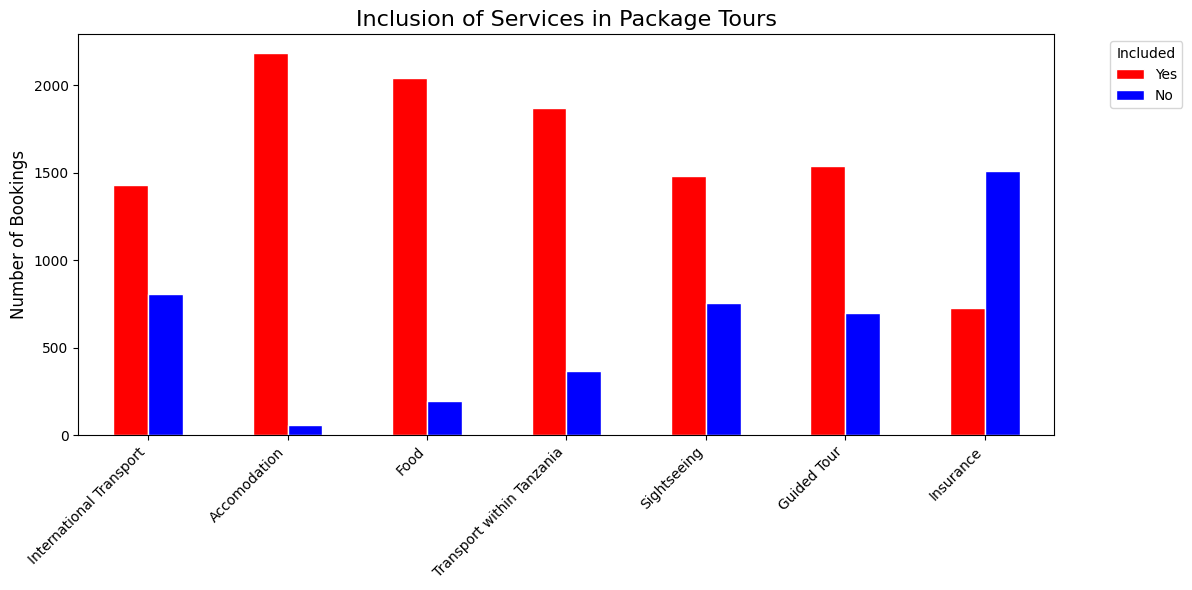

In [891]:
tourarrangement = train_df[['tour_arrangement','package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance']].copy()

packages_tourarrangements = tourarrangement[(tourarrangement.tour_arrangement == 'Package Tour')]
packages_tourarrangements = packages_tourarrangements.drop(['tour_arrangement'], axis=1)
packages_tourarrangements_num = packages_tourarrangements.apply(pd.Series.value_counts)

for col in packages_tourarrangements_num.columns:
    if 'Yes' not in packages_tourarrangements_num.index:
        packages_tourarrangements_num.loc['Yes', col] = 0
    if 'No' not in packages_tourarrangements_num.index:
        packages_tourarrangements_num.loc['No', col] = 0
packages_tourarrangements_num = packages_tourarrangements_num.loc[['Yes', 'No']]

ax = packages_tourarrangements_num.T.plot.bar(
    color = {'Yes': "red", 'No':'blue'},
    edgecolor='White',
    figsize=(12, 6)
)

ax.set_xticklabels([
    'International Transport', 'Accomodation', 'Food',
    'Transport within Tanzania', 'Sightseeing', 'Guided Tour', 'Insurance'
], rotation=45, ha="right")

ax.set_title('Inclusion of Services in Package Tours', fontsize=16)
ax.set_ylabel('Number of Bookings', fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(title='Included', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

*Accommodation and Food are the most frequently included services in package tours*

####Scatter Plots

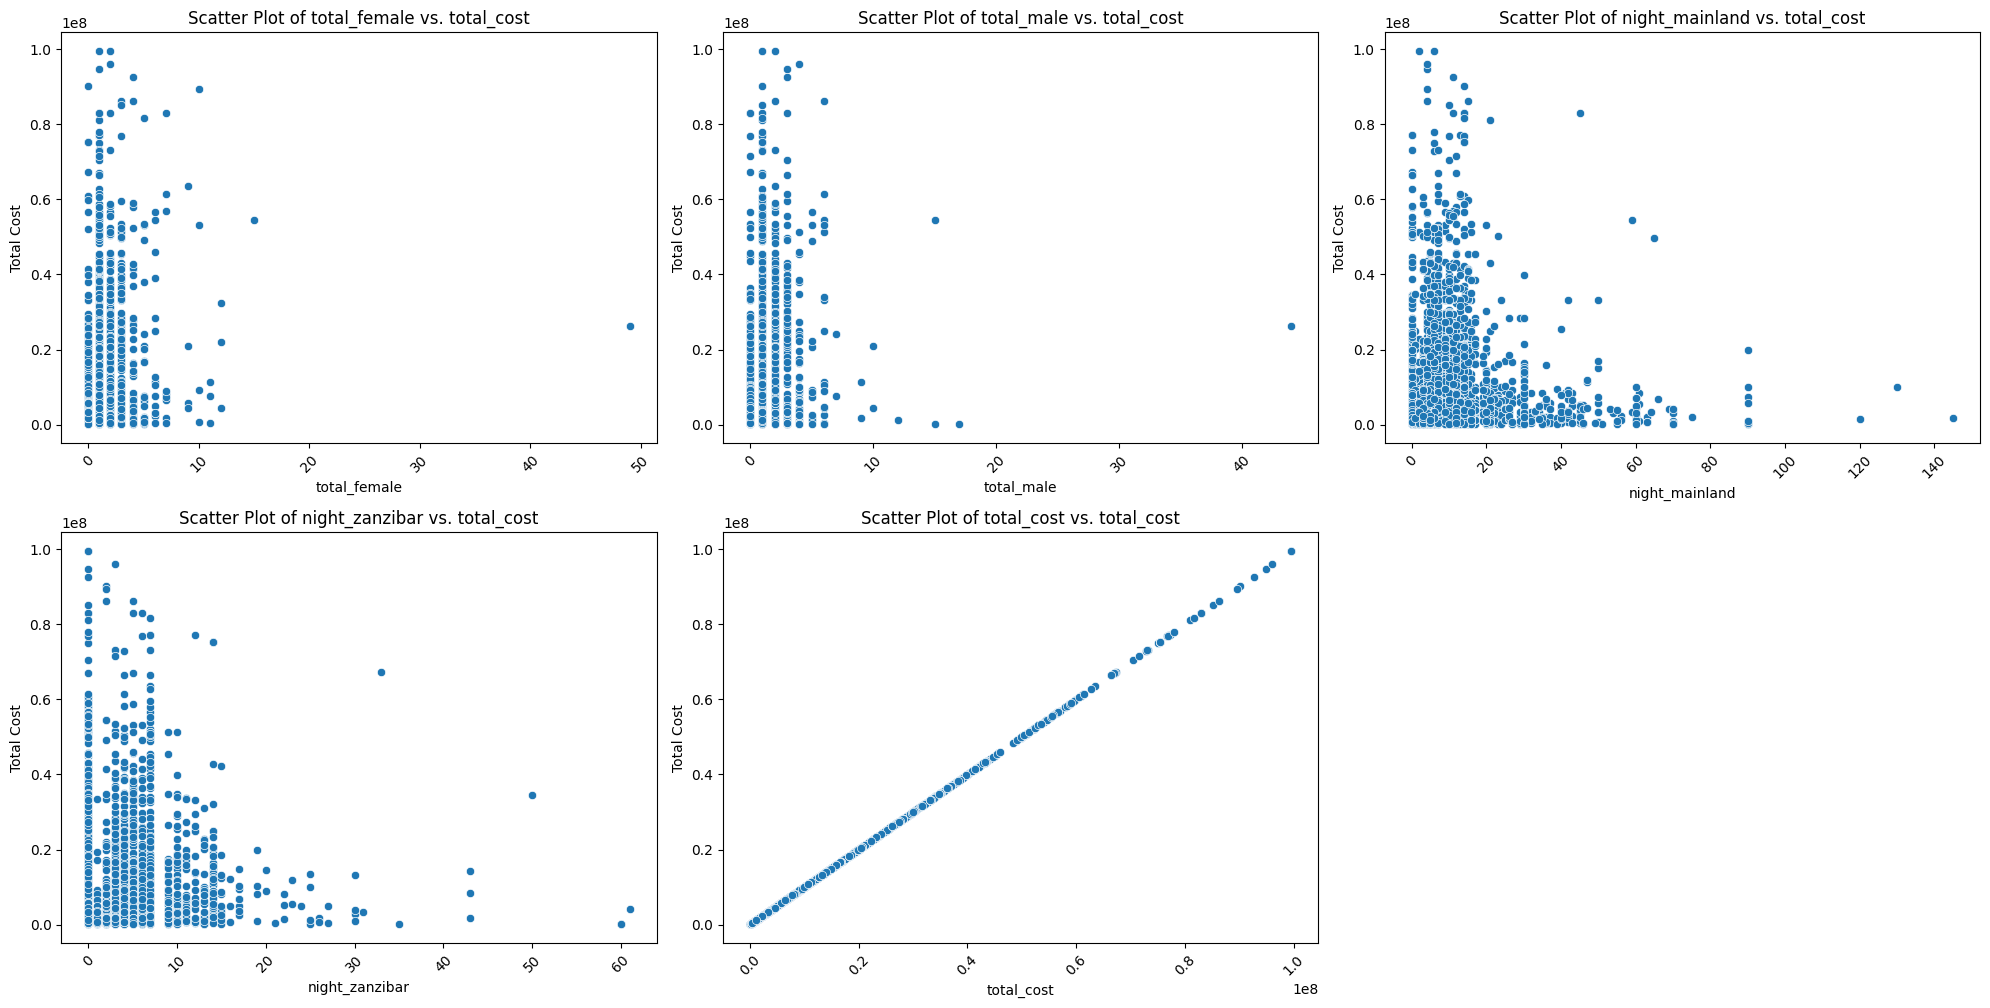

In [892]:
num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

plt.figure(figsize=(20, 5 * num_rows))  # Adjust size based on number of rows

for i, var in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=train_df, x=var, y='total_cost')
    plt.title(f'Scatter Plot of {var} vs. total_cost')
    plt.xlabel(var)
    plt.ylabel('Total Cost')
    plt.xticks(rotation=45)

plt.tight_layout()  # Helps avoid overlapping
plt.show()

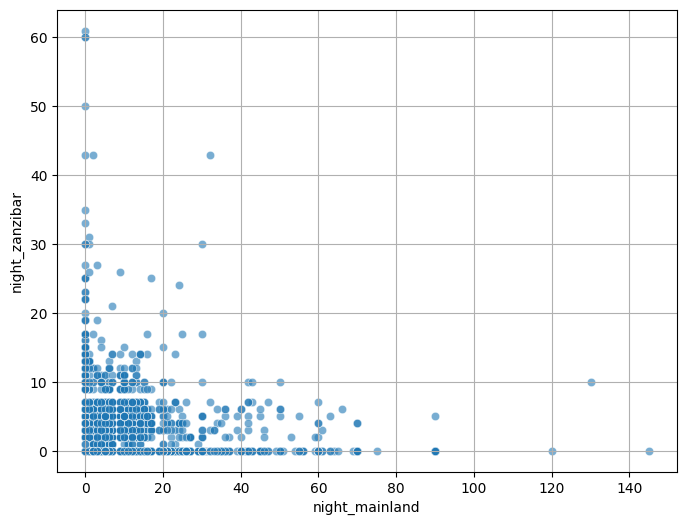

In [893]:
df_scatter = train_df[['night_zanzibar', 'night_mainland']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scatter, x='night_mainland', y='night_zanzibar', alpha=0.6)
plt.xlabel('night_mainland')
plt.ylabel('night_zanzibar')
plt.grid(True)
plt.show()

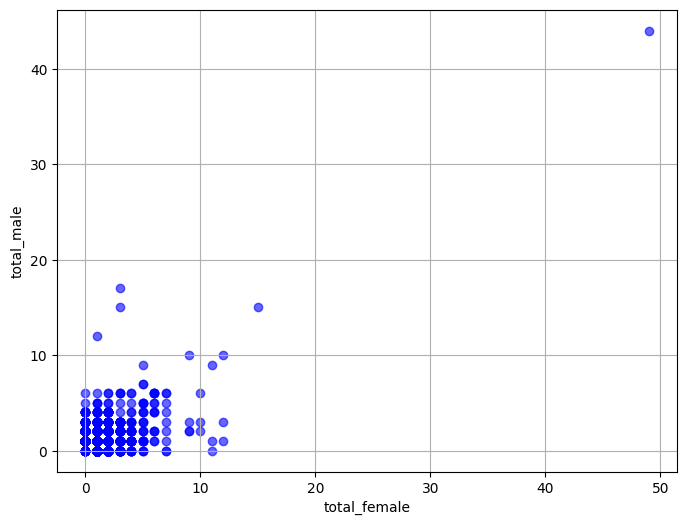

In [894]:
x = train_df['total_female']
y = train_df['total_male']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel('total_female')
plt.ylabel('total_male')
plt.grid(True)
plt.show()

*no clear relationship between them*

#**Data Cleaning**

In [895]:
joined_data_df.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [896]:
# Handling the missing values by filling 'None'
joined_data_df.travel_with.fillna('None',inplace=True)
joined_data_df.most_impressing.fillna('None',inplace=True)

# Handling the missing values by filling through the mean value
joined_data_df.total_female.fillna(joined_data_df.total_female.mean(),inplace = True)
joined_data_df.total_male.fillna(joined_data_df.total_male.mean(),inplace = True)

In [897]:
joined_data_df.isnull().sum() # test does not have total_cost so all will be missing

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


#**Feature Engineering**

##Feature Construction

In [898]:
africa = ['SOUTH AFRICA','NIGERIA','MOZAMBIQUE', 'RWANDA','KENYA', 'ALGERIA','EGYPT','MALAWI',
          'UGANDA','ZIMBABWE', 'ZAMBIA', 'CONGO','MAURITIUS', 'DRC','SWAZILAND', 'TUNISIA',
          'ETHIOPIA','BURUNDI','GHANA', 'NIGER','ANGOLA','CAPE VERDE', 'SUDAN','NAMIBIA',
          'LESOTHO','IVORY COAST', 'MADAGASCAR', 'DJIBOUT','MORROCO','BOTSWANA','LIBERIA',
          'GUINEA', 'SOMALI','COMORO',
          ]
is_african = []

for country in joined_data_df['country']:
    if country in africa:
        is_african.append(True)
    else:
        is_african.append(False)

joined_data_df['is_african'] = is_african

peak_period = []

for row in joined_data_df.purpose:
    if row == 'Leisure and Holidays':
        peak_period.append(True)
    else:
        peak_period.append(False)

joined_data_df['peak_period'] = peak_period

older_tourists = []

for row in joined_data_df.age_group:
    if row == '65+':
        older_tourists.append(True)
    else :
        older_tourists.append(False)

joined_data_df['older_tourists'] = older_tourists

# Here we get two more features of the total number of people and the total number of nights spent
joined_data_df["total_persons"] = joined_data_df["total_female"] + joined_data_df["total_male"]
joined_data_df["total_nights_spent"] = joined_data_df["night_mainland"] + joined_data_df["night_zanzibar"]
joined_data_df.columns.tolist()
joined_data_df.shape

(6410, 28)

In [899]:
# some other features
# joined_data_df["is_first_trip"] = joined_data_df["first_trip_tz"].map({"Yes": 1, "No": 0})
# joined_data_df["impression_word_count"] = joined_data_df["most_impressing"].fillna("").apply(lambda x: len(str(x).split()))

# total number of package services for each tourist
# package_columns = [
#     'package_transport_int', 'package_accomodation', 'package_food',
#     'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
#     'package_insurance'
# ]

# yes_no_mapping = {"Yes": 1, "No": 0}
# for col in package_columns:
#     if col in joined_data_df.columns:
#         joined_data_df[f'{col}_binary_temp'] = joined_data_df[col].map(yes_no_mapping)

# joined_data_df.loc[:, 'num_package_services'] = joined_data_df[[f'{col}_binary_temp' for col in package_columns if f'{col}_binary_temp' in joined_data_df.columns]].sum(axis=1)
# joined_data_df = joined_data_df.drop(columns=[f'{col}_binary_temp' for col in package_columns if f'{col}_binary_temp' in joined_data_df.columns])

# joined_data_df

##Encode Categorical Variables

In [900]:
le = LabelEncoder()
joined_data_df['age_group'] = le.fit_transform(joined_data_df['age_group'])
joined_data_df['package_transport_int'] = le.fit_transform(joined_data_df['package_transport_int'])
joined_data_df['package_accomodation'] = le.fit_transform(joined_data_df['package_accomodation'])
joined_data_df['package_food'] = le.fit_transform(joined_data_df['package_food'])
joined_data_df['package_transport_tz'] = le.fit_transform(joined_data_df['package_transport_tz'])
joined_data_df['package_sightseeing'] = le.fit_transform(joined_data_df['package_sightseeing'])
joined_data_df['package_guided_tour'] = le.fit_transform(joined_data_df['package_guided_tour'])
joined_data_df['package_insurance'] = le.fit_transform(joined_data_df['package_insurance'])
joined_data_df['first_trip_tz'] = le.fit_transform(joined_data_df['first_trip_tz'])
joined_data_df['country'] = le.fit_transform(joined_data_df['country'])
joined_data_df['peak_period'] = le.fit_transform(joined_data_df['peak_period'])
joined_data_df['is_african'] = le.fit_transform(joined_data_df['is_african'])
joined_data_df['older_tourists'] = le.fit_transform(joined_data_df['older_tourists'])

In [901]:
columns_to_transform = ['tour_arrangement',
                        'travel_with',
                        'purpose',
                        'main_activity',
                        'info_source',
                        'most_impressing',
                        'payment_mode']
joined_data_df = pd.get_dummies( joined_data_df,columns = columns_to_transform,drop_first=True)

In [902]:
joined_data_df["total_female"] = joined_data_df['total_female'].astype('int')
joined_data_df["total_male"] = joined_data_df['total_male'].astype('int')
joined_data_df["night_mainland"] = joined_data_df['night_mainland'].astype('int')
joined_data_df["night_zanzibar"] = joined_data_df['night_zanzibar'].astype('int')

#**Model Training**

In [903]:
train_df=joined_data_df[joined_data_df.total_cost.notnull()].reset_index(drop=True)
test_df=joined_data_df[joined_data_df.total_cost.isna()].reset_index(drop=True)

In [904]:
print(train_df.shape)
print(test_df.shape)

(4809, 58)
(1601, 58)


In [905]:
featured_cols = train_df.drop(["ID", "total_cost"], axis=1)
cols = featured_cols.columns
target=train_df["total_cost"]

In [906]:
x_train, x_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.25, random_state = 42)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(3606, 56) (3606,)
(1203, 56) (1203,)


In [907]:
base_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
}

In [908]:
def evaluate_models(x_train, x_test, y_train, y_test, models):
    results = []

    for name, model in models.items():
        try:
            model.fit(x_train, y_train)
            preds = model.predict(X_test)
            mae_score = mean_absolute_error(y_test, preds)
            results.append({'Model': name, 'MAE': mae_score})
        except Exception as e:
            print(f"Error with model {name}: {e}")

    return pd.DataFrame(results).sort_values(by="MAE")

In [909]:
results_df = evaluate_models(x_train, x_test, y_train, y_test, base_models)
print(results_df)

               Model           MAE
5           CatBoost  5.149517e+06
3       RandomForest  5.288002e+06
2              Lasso  5.649614e+06
1              Ridge  5.651465e+06
0  Linear Regression  5.661945e+06
4            XGBoost  5.694134e+06


In [910]:
best_model_name = results_df.iloc[0]['Model']
print(f"The best model is: {best_model_name}")

The best model is: CatBoost


*hyperparameter tuning*

In [911]:
predictions = []
for i in range(10):
    ct=CatBoostRegressor(iterations=1000,
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i
                    )
    ct.fit(X_train, y_train)
    preds = ct.predict(X_test)
    predictions.append(preds)
    preds = np.mean(predictions, axis = 0)

#**Model evaluation**

In [912]:
mae = mean_absolute_error(y_test, preds)
print('Error {}'.format(mae))

Error 4662442.094621236


In [913]:
lgbmr =RandomForestRegressor()
lgbmr.fit(x_train, y_train)
lgb_preds = lgbmr.predict(x_test)

mae = mean_absolute_error(y_test, lgb_preds)
print('RandomForestRegressor Error {}'.format(mae))

xgbmr =xgb.XGBRegressor()
xgbmr.fit(x_train, y_train)
xgb_preds = xgbmr.predict(x_test)

mae = mean_absolute_error(y_test, xgb_preds)
print('XGBR Error {}'.format(mae))

RandomForestRegressor Error 5277213.843055638
XGBR Error 5694133.952504177


In [914]:
submission = test_df[cols]
predictions_ct = ct.predict(submission)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_ct})

In [915]:
submission_df.to_csv('submission.csv',index=False)

In [916]:
submission_df

,ID,total_cost
0,tour_1,2.285895e+07
1,tour_100,2.239260e+07
2,tour_1001,1.167215e+07
3,tour_1006,3.209230e+06
4,tour_1009,2.097290e+07
...,...,...
1596,tour_988,6.576901e+05
1597,tour_990,1.729702e+07
1598,tour_992,1.182839e+06
1599,tour_996,3.143252e+05


                                           Feature Id  Importances
0                                       total_persons    10.858326
1                                             country     9.283709
2                       tour_arrangement_Package Tour     8.964307
3                                  total_nights_spent     6.418043
4                                      night_mainland     6.125399
5                               package_transport_int     5.236009
6                                           age_group     5.050945
7                                      night_zanzibar     4.869299
8                                package_accomodation     3.806360
9                                        total_female     3.239124
10                                         total_male     2.766888
11                                  package_insurance     2.754913
12                                         is_african     2.704978
13                               package_transport_tz     2.62

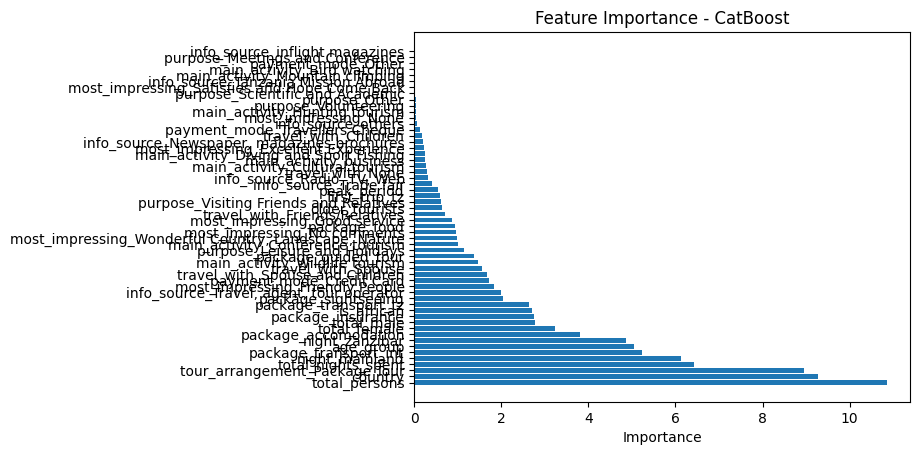

In [917]:
best_model = CatBoostRegressor(verbose=0)
best_model.fit(x_train, y_train)


feature_importance = best_model.get_feature_importance(prettified=True)
print(feature_importance)
plt.barh(feature_importance['Feature Id'], feature_importance['Importances'])
plt.xlabel('Importance')
plt.title('Feature Importance - CatBoost')
plt.show()